### Data Loading and Preprocessing

In [ ]:
from stock_3.load_prep_viz import (
    parse_and_normalize_data,
    create_sequences_multivariate,
    split_data
)


data_path = 'data/MSFT.csv'
df = pd.read_csv(data_path)
lookback = 75

scaled_data = parse_and_normalize_data(data_path)

X, y = create_sequences_multivariate(scaled_data, lookback)

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (6432, 75, 7), y_train shape: (6432, 7)
X_val shape: (1378, 75, 7), y_val shape: (1378, 7)
X_test shape: (1379, 75, 7), y_test shape: (1379, 7)


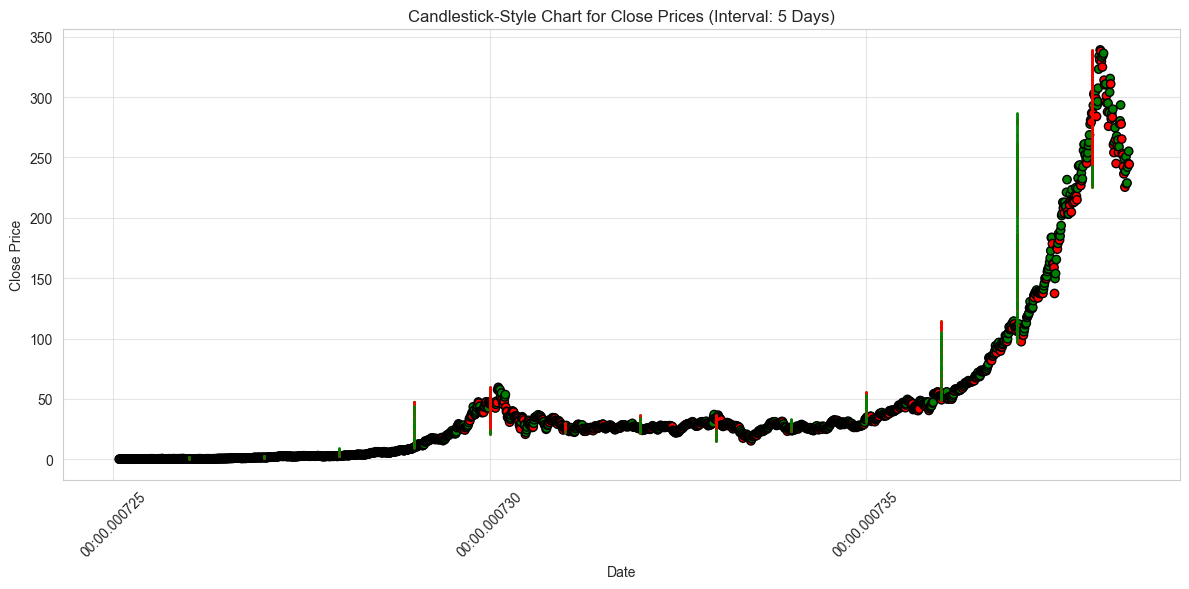

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from stock_3.load_prep_viz import plot_candlestick_close_intermittent

plot_candlestick_close_intermittent(
    data=df,
    date_col='Date',
    close_col='Close',
    interval=5 
)

### SimpleRNN

In [ ]:
from stock_3.models_and_eval import build_simple_rnn_model

input_shape = X_train.shape[1:]
output_dim = y_train.shape[-1]

simple_rnn_model = build_simple_rnn_model(input_shape=input_shape, output_dim=output_dim)

simple_rnn_model.summary()

history_simple_rnn = simple_rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,063 (19.78 KB)

 Trainable params: 5,063 (19.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8092e-04 - mse: 2.8092e-04 - val_loss: 6.7697e-04 - val_mse: 6.7697e-04
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3244e-04 - mse: 2.3244e-04 - val_loss: 5.3971e-04 - val_mse: 5.3971e-04
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8140e-04 - mse: 1.8140e-04 - val_loss: 5.2359e-04 - val_mse: 5.2359e-04
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6378e-04 - mse: 1.6378e-04 - val_loss: 5.0298e-04 - val_mse: 5.0298e-04
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7166e-04 - mse: 1.7166e-04 - val_loss: 3.5337e-04 - val_mse: 3.5337e-04
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4692e-04 - mse: 1.4692e-04 - val_loss: 4.6849e-04 - val_mse: 4.6849e-04
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1430e-04 - mse: 

#### Learning Curves for SimpleRNN

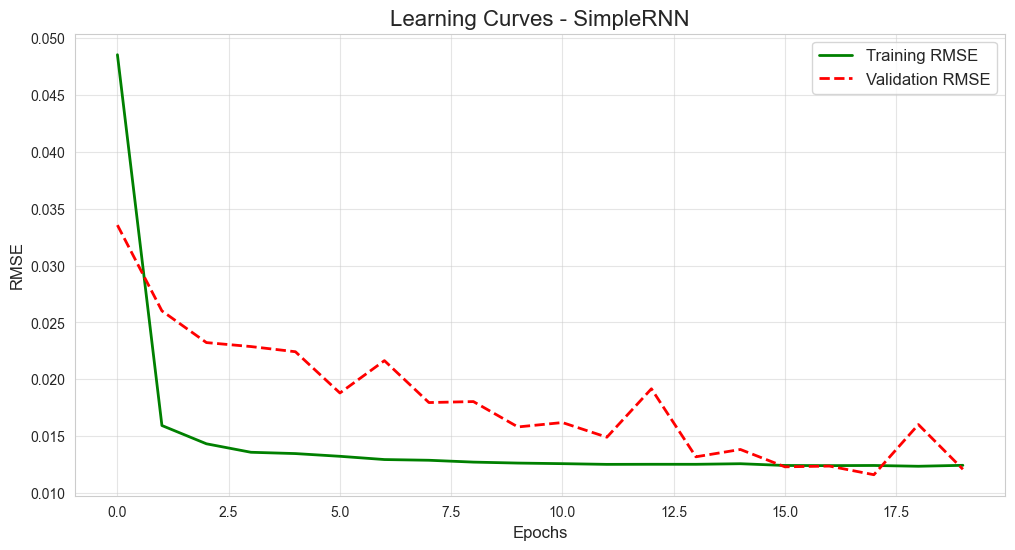

In [12]:
plot_rmse_learning_curves(history_simple_rnn, title='Learning Curves - SimpleRNN')

### Bi-LSTM

In [ ]:
from stock_3.models_and_eval import build_bi_lstm_model

input_shape = (X_train.shape[1], X_train.shape[2]) 
output_dim = X_train.shape[2] 
bi_lstm_model = build_bi_lstm_model(input_shape=input_shape, output_dim=output_dim)

bi_lstm_model.summary()

history_bi_lstm = bi_lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,767 (147.53 KB)

 Trainable params: 37,767 (147.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 1.7111e-04 - val_mse: 1.7111e-04
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.0308e-04 - mse: 2.0308e-04 - val_loss: 1.6790e-04 - val_mse: 1.6790e-04
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.8833e-04 - mse: 1.8833e-04 - val_loss: 1.3237e-04 - val_mse: 1.3237e-04
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.6157e-04 - mse: 1.6157e-04 - val_loss: 9.6876e-05 - val_mse: 9.6876e-05
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.4719e-04 - mse: 1.4719e-04 - val_loss: 1.1061e-04 - val_mse: 1.1061e-04
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.7050e-04 - mse: 1.7050e-04 - val_loss: 1.1669e-04 - val_mse: 1.1669e-04
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.3694e-04 - mse: 1.3694e-04 - val_loss: 8.5898e-05 - val_mse: 8.5898e-05
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.

#### Learning Curves for Bidirectional Model

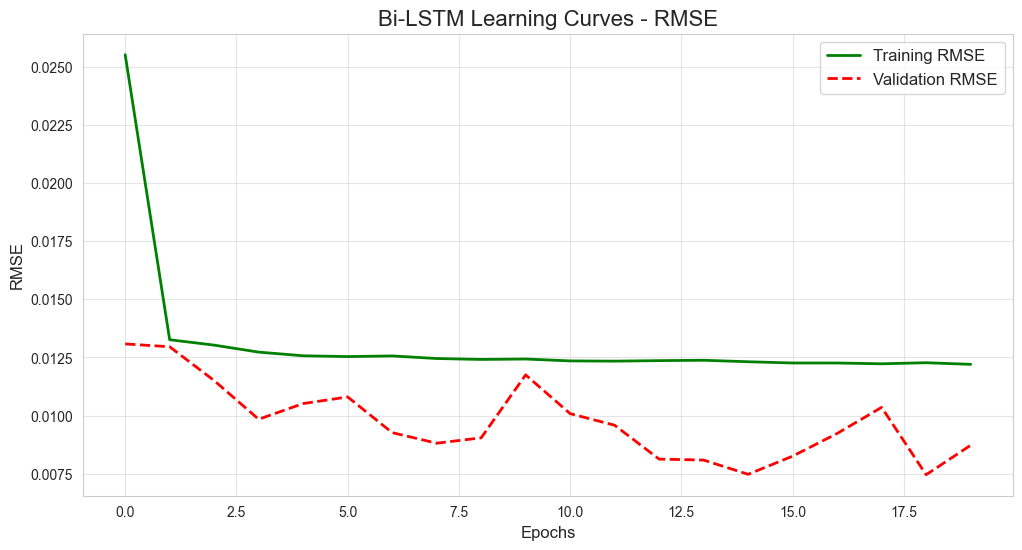

In [ ]:
from stock_3.load_prep_viz import plot_rmse_learning_curves
plot_rmse_learning_curves(history_bi_lstm, title='Bi-LSTM Learning Curves - RMSE')

### 1D Convolutional

In [ ]:
from stock_3.models_and_eval import build_conv1d_model
import seaborn as sns
import numpy as np

input_shape = X_train.shape[1:]
output_dim = y_train.shape[-1]

conv1d_model = build_conv1d_model(input_shape=input_shape, output_dim=output_dim)

conv1d_model.summary()

history_conv1d = conv1d_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

#### Learning Curves for 1D Convolutional Model

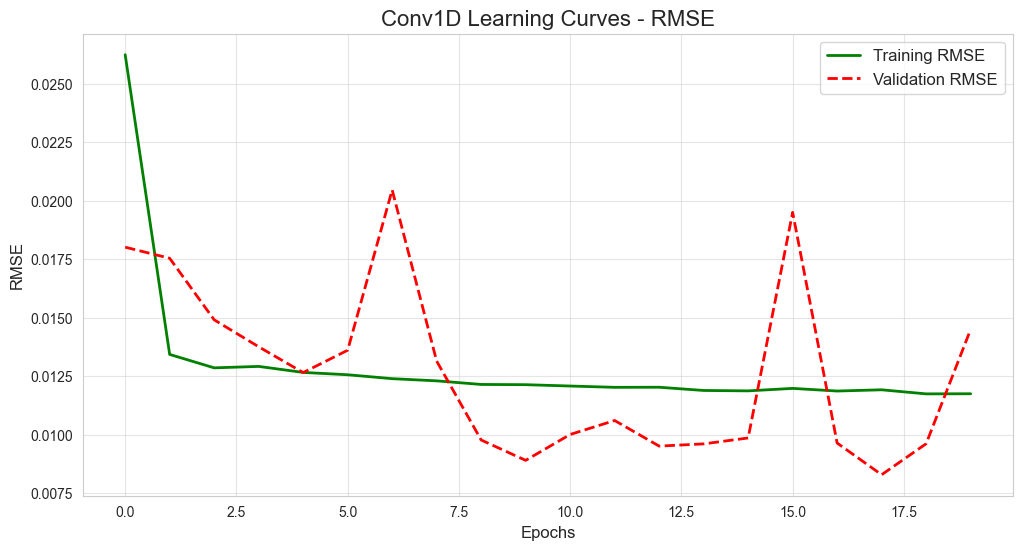

In [ ]:

plot_rmse_learning_curves(history_conv1d, title='Conv1D Learning Curves - RMSE')

### Final Evaluation on Test Set
**RMSE-to-Mean Feature Value Ratio**

In [ ]:
from stock_3.models_and_eval import calculate_rmse_ratios

conv1d_rmse_ratios = calculate_rmse_ratios(conv1d_model, X_test, y_test)
bilstm_rmse_ratios = calculate_rmse_ratios(bi_lstm_model, X_test, y_test)
simplernn_rmse_ratios = calculate_rmse_ratios(simple_rnn_model, X_test, y_test)

comparison_df = pd.DataFrame({
    'Attribute': df.columns,
    'Conv1D RMSE Ratio': conv1d_rmse_ratios,
    'Bi-LSTM RMSE Ratio': bilstm_rmse_ratios,
    'SimpleRNN RMSE Ratio': simplernn_rmse_ratios
})

comparison_df

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Attribute,Conv1D RMSE Ratio,Bi-LSTM RMSE Ratio,SimpleRNN RMSE Ratio
0,Date,0.153472,0.054999,0.108436
1,Low,0.126898,0.101596,0.058113
2,Open,0.118294,0.035687,0.158583
3,Volume,7.127606,0.844772,2.595691
4,High,0.148964,0.050058,0.043285
5,Close,0.142882,0.063374,0.283077
6,Adjusted Close,0.186185,0.179894,0.377282


**Mean Squared Error**

In [ ]:
from sklearn.metrics import mean_squared_error

conv1d_test_predictions = conv1d_model.predict(X_test)
conv1d_rmse_test = np.sqrt(mean_squared_error(y_test, conv1d_test_predictions))
conv1d_mse_test = mean_squared_error(y_test, conv1d_test_predictions)

bilstm_test_predictions = bi_lstm_model.predict(X_test)
bilstm_rmse_test = np.sqrt(mean_squared_error(y_test, bilstm_test_predictions))
bilstm_mse_test = mean_squared_error(y_test, bilstm_test_predictions)


simplernn_test_predictions = simple_rnn_model.predict(X_test)
simplernn_rmse_test = np.sqrt(mean_squared_error(y_test, simplernn_test_predictions))
simplernn_mse_test = mean_squared_error(y_test, simplernn_test_predictions)

test_evaluation_df = pd.DataFrame({
    'Model': ['SimpleRNN', 'Conv1D', 'Bi-LSTM'],
    'Test RMSE': [simplernn_rmse_test, conv1d_rmse_test, bilstm_rmse_test],
    'Test MSE': [simplernn_mse_test, conv1d_mse_test, bilstm_mse_test]
})

test_evaluation_df

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Model,Test RMSE,Test MSE
0,SimpleRNN,0.110123,0.012127
1,Conv1D,0.110149,0.012133
2,Bi-LSTM,0.049307,0.002431


#### Model Comparison Chart

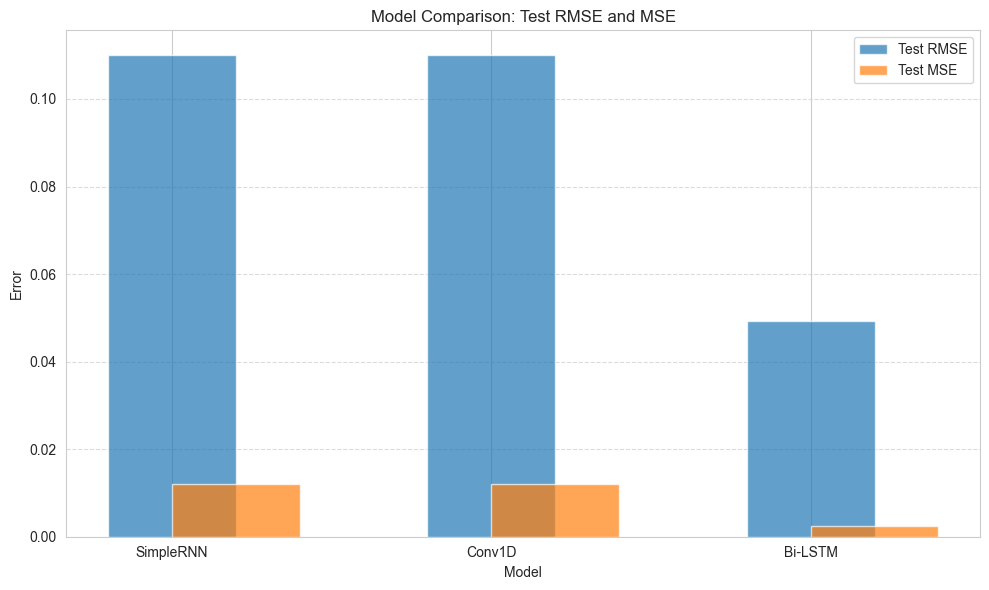

In [ ]:
import matplotlib.pyplot as plt
from stock_3.load_prep_viz import plot_model_comparison

models = ['SimpleRNN', 'Conv1D', 'Bi-LSTM']
rmse_values = [simplernn_rmse_test, conv1d_rmse_test, bilstm_rmse_test]
mse_values = [simplernn_mse_test, conv1d_mse_test, bilstm_mse_test]

plot_model_comparison(models, rmse_values, mse_values)